# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


In [4]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           5.02e-23
Time:                        18:14:10   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='net_bill', ylabel='tip'>

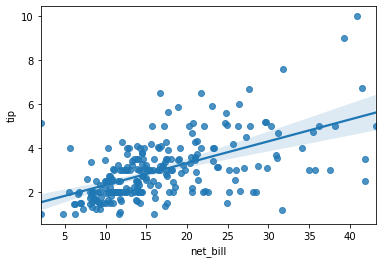

In [5]:
sns.regplot(y = 'tip', x = 'net_bill', data = tips)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [8]:
reg1 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.52e-06
Time:                        18:10:27   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='net_bill', ylabel='tip_pct'>

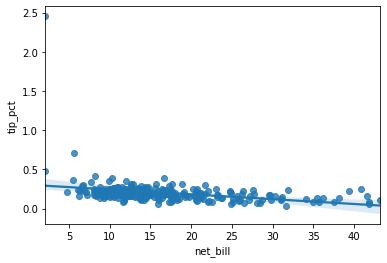

In [7]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

* Apesar de que em maiores contas se encontram maiores gorjetas, maiores contas são menos frequentes e a variância entre o valor da gorjeta também aumenta, logo a porcentagem das gorjetas cai conforme o valor da conta aumenta.

* Os R² são comparáveis porque o das gorjetas explica que "maiores contas tem a possibilidade de produzirem maiores contas, mas que em si, são menos frequentes" e o da porcentagem explica que "Devido ao fato de maiores contas serem menos frequentes, há menos gorjetas totais arrecadadas".

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [9]:
pred = reg1.fittedvalues
pred

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [10]:
tips['tip_pred'] = pred * tips['net_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,3.309254
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,2.186938
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.461450
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.668785
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.699998
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,3.773120
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,3.790751
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,3.684707
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,3.319003


In [11]:
reg = smf.ols('tip_pred ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               tip_pred   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     99.74
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           6.88e-20
Time:                        18:10:38   Log-Likelihood:                -192.63
No. Observations:                 244   AIC:                             389.3
Df Residuals:                     242   BIC:                             396.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2819      0.079     28.704      0.000       2.125       2.438
net_bill       0.0427      0.004      9.987      0.000       0.034       0.051
==============================================================================
Omnibus:                       97.034   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.025
Skew:                          -1.782   Prob(JB):                     5.74e-62
Kurtosis:                       6.878   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* O R² usando a nova variável tip_pred pelo valor predito do percentual de gorjetas abaixou. É provável que o a predição não tenha levado em conta aspectos como a variância das gorjetas ao aumentar o valor da conta.

https://github.com/IlsF33/EBAC